# **Descriptor Calculation and Dataset Preparation**
---

## **Download PaDEL-Descriptor**

In [1]:
! wget https://github.com/aniketnaik7/Drug-Discovery/raw/main/PaDEL-Descriptor.zip
! wget https://github.com/aniketnaik7/Drug-Discovery/raw/main/padel_old.sh

--2025-07-08 00:59:28--  https://github.com/aniketnaik7/Drug-Discovery/raw/main/PaDEL-Descriptor.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aniketnaik7/Drug-Discovery/main/PaDEL-Descriptor.zip [following]
--2025-07-08 00:59:28--  https://raw.githubusercontent.com/aniketnaik7/Drug-Discovery/main/PaDEL-Descriptor.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25734499 (25M) [application/zip]
Saving to: ‘PaDEL-Descriptor.zip’

PaDEL-Descriptor.zi 100%[===================>]  24.54M  --.-KB/s    in 0.05s   

2025-07-08 00:59:30 (460 MB/s) - ‘PaDEL-Descriptor.zip’ saved [25734499/257

In [2]:
! unzip PaDEL-Descriptor.zip

Archive:  PaDEL-Descriptor.zip
   creating: PaDEL-Descriptor/
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
   creating: PaDEL-Descriptor/license/
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: PaDEL-Descriptor/PubchemFingerprinter.xml  
  inflating: PaDEL-Descriptor/ExtendedFingerprinter.xml  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprinter.xml  
  inflating: PaDEL-Descriptor/GraphOnlyFingerprinter.xml  
  inflating: PaDEL-Descriptor/SubstructureFingerprinter.xml  
  inflating: PaDEL-Descriptor/Descriptors.xls  
   creating: PaDEL-Descriptor/lib/
  inflating: PaDEL-Descriptor/PaDEL-Descriptor.jar  
  inflating: PaDEL-Descriptor/SubstructureFingerprintCount.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprintCount.xml  
  inflating:

## **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Part 1 of the Bioinformatics Project series. Here we will be using the **bioactivity_data_3class_pIC50.csv** file that essentially contain the pIC50 values that we will be using for building a regression model.

In [8]:
! wget https://raw.githubusercontent.com/aniketnaik7/Drug-Discovery/master/acetylcholinesterase_04_bioactivity_data_pIC50.csv

--2025-07-08 01:02:10--  https://raw.githubusercontent.com/aniketnaik7/Drug-Discovery/master/acetylcholinesterase_04_bioactivity_data_pIC50.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2345 (2.3K) [text/plain]
Saving to: ‘acetylcholinesterase_04_bioactivity_data_pIC50.csv’

acetylcholinesteras 100%[===================>]   2.29K  --.-KB/s    in 0s      

2025-07-08 01:02:10 (45.4 MB/s) - ‘acetylcholinesterase_04_bioactivity_data_pIC50.csv’ saved [2345/2345]



In [9]:
! pip install lazypredict

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [10]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_pIC50.csv')

In [11]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,intermediate,350.59,4.72,0.00,5.00,5.74
1,1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.56,6.32,0.00,6.00,3.95
2,2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.53,5.93,0.00,6.00,4.43
3,3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,427.50,5.54,0.00,6.00,5.35
4,4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,413.48,5.15,0.00,6.00,5.74
5,5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,399.45,4.76,0.00,6.00,5.42
6,6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.42,4.37,0.00,6.00,4.91
7,7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,intermediate,371.40,3.98,0.00,6.00,5.00
8,8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,intermediate,357.37,3.59,0.00,6.00,5.08
9,9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,intermediate,478.59,7.94,0.00,8.00,5.75


In [12]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [13]:
! cat molecule.smi | head -5

CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl	CHEMBL463210
CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O	CHEMBL2252723
CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O	CHEMBL2252722
CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O	CHEMBL2252721
CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O	CHEMBL2252851


In [14]:
! cat molecule.smi | wc -l

18


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [15]:
! cat padel_old.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv

In [16]:
#Will take ~5 mins
! bash padel_old.sh

Processing CHEMBL2252723 in molecule.smi (2/18). 
Processing CHEMBL463210 in molecule.smi (1/18). 
Processing CHEMBL2252722 in molecule.smi (3/18). Average speed: 1.16 s/mol.
Processing CHEMBL2252721 in molecule.smi (4/18). Average speed: 0.76 s/mol.
Processing CHEMBL2252851 in molecule.smi (5/18). Average speed: 0.57 s/mol.
Processing CHEMBL2252850 in molecule.smi (6/18). Average speed: 0.52 s/mol.
Processing CHEMBL2252849 in molecule.smi (7/18). Average speed: 0.55 s/mol.
Processing CHEMBL2252848 in molecule.smi (8/18). Average speed: 0.46 s/mol.
Processing CHEMBL2252847 in molecule.smi (9/18). Average speed: 0.41 s/mol.
Processing CHEMBL2252846 in molecule.smi (10/18). Average speed: 0.42 s/mol.
Processing CHEMBL2252845 in molecule.smi (11/18). Average speed: 0.38 s/mol.
Processing CHEMBL2252844 in molecule.smi (12/18). Average speed: 0.39 s/mol.
Processing CHEMBL2252842 in molecule.smi (14/18). Average speed: 0.35 s/mol.
Processing CHEMBL2252843 in molecule.smi (13/18). Average spe

In [17]:
! ls -l

total 25196
-rw-r--r-- 1 root root     2345 Jul  8 01:02 acetylcholinesterase_04_bioactivity_data_pIC50.csv
-rw-r--r-- 1 root root    43351 Jul  8 01:02 descriptors_output.csv
-rw-r--r-- 1 root root      907 Jul  8 01:02 molecule.smi
drwxr-xr-x 4 root root     4096 Jul  6 02:50 PaDEL-Descriptor
-rw-r--r-- 1 root root 25734499 Jul  8 00:59 PaDEL-Descriptor.zip
-rw-r--r-- 1 root root      230 Jul  8 00:59 padel_old.sh
drwxr-xr-x 1 root root     4096 Jul  4 13:34 sample_data


## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [19]:
X = pd.read_csv('descriptors_output.csv')

In [20]:
X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL463210,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2252723,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL2252722,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL2252721,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL2252851,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CHEMBL2252850,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHEMBL2252849,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CHEMBL2252848,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CHEMBL2252847,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,CHEMBL2252846,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X = X.drop(columns=['Name'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
Y = df3['pIC50']
Y

,pIC50
0,5.74
1,3.95
2,4.43
3,5.35
4,5.74
5,5.42
6,4.91
7,5.00
8,5.08
9,5.75


In [23]:
df = pd.concat([X,Y], axis=1)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.74
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.95
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.43
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.35
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.74
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.42
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.91
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.00
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.08
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.75


# **Comparing Regressors**



## **3. Data pre-processing**

In [24]:
# Examine X dimension
X.shape

(18, 881)

In [25]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(18, 90)

In [34]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [35]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 0
[LightGBM] [Info] Start training from score 5.040800
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 0
[LightGBM] [Info] Start training from score 5.040800
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [36]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,4.53,-19.90,5.05,0.01
QuantileRegressor,1.17,-0.00,1.11,0.02
ElasticNet,1.17,0.00,1.10,0.01
ElasticNetCV,1.17,0.00,1.10,0.57
HistGradientBoostingRegressor,1.17,0.00,1.10,0.04
Lasso,1.17,0.00,1.10,0.01
DummyRegressor,1.17,0.00,1.10,0.01
LassoLars,1.17,0.00,1.10,0.01
LGBMRegressor,1.17,0.00,1.10,0.02


In [37]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,3.48,-70.79,5.72,0.01
GaussianProcessRegressor,1.99,-27.80,3.62,0.01
XGBRegressor,1.62,-16.84,2.85,0.05
OrthogonalMatchingPursuit,1.37,-9.59,2.20,0.01
DecisionTreeRegressor,1.36,-9.48,2.19,0.01
ExtraTreeRegressor,1.36,-9.48,2.19,0.01
MLPRegressor,1.30,-7.61,1.98,0.02
OrthogonalMatchingPursuitCV,1.21,-5.00,1.65,0.01
LinearSVR,1.16,-3.76,1.47,0.01


## **5. Data visualization of model performance**

[(0.0, 1.0)]

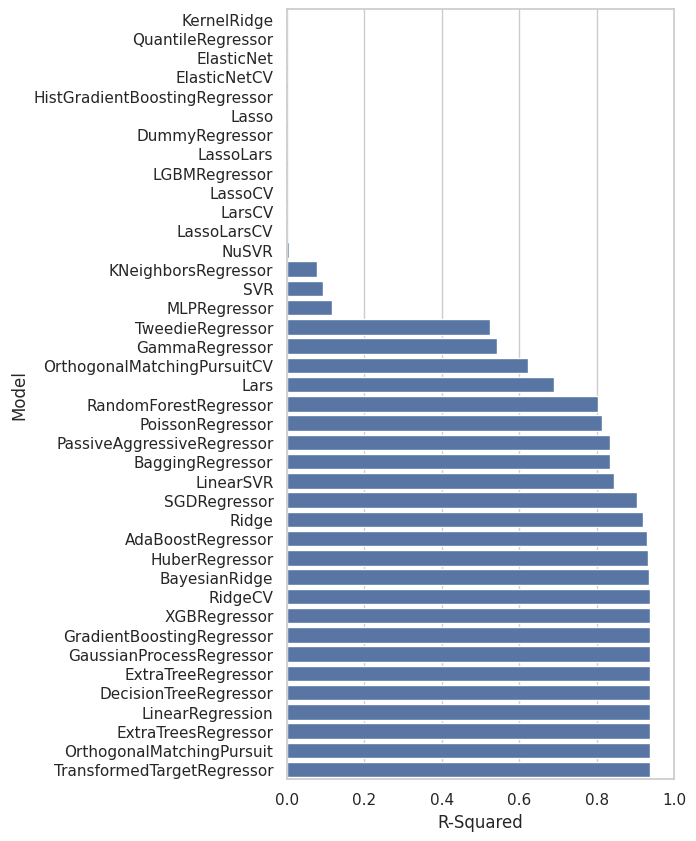

In [30]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

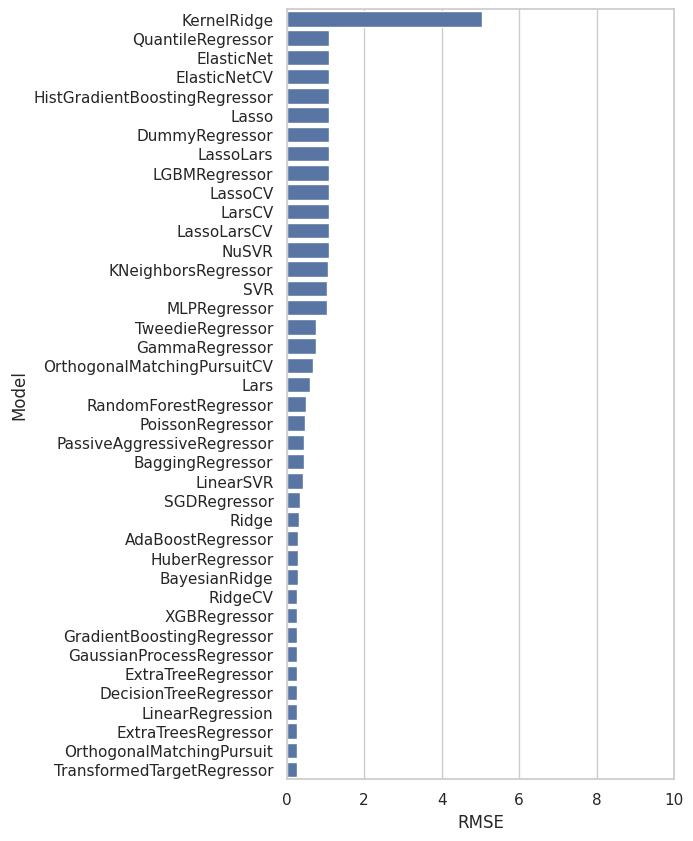

In [31]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

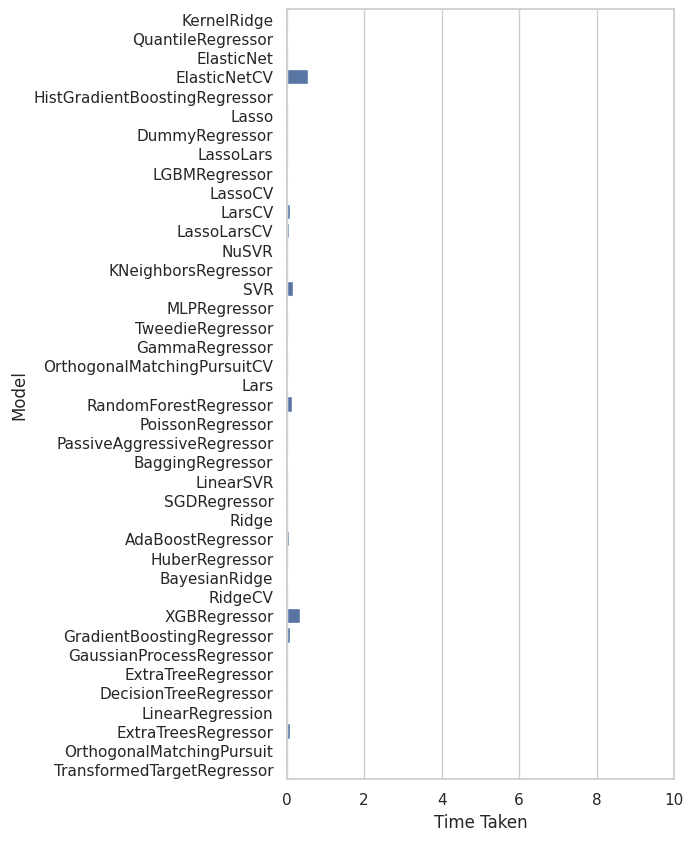

In [32]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))